# Understanding Matrix Transformations

A matrix transformation (or linear transformation) is a function that maps vectors from one space to another using matrix multiplication. It's a fundamental concept in linear algebra with wide applications in computer graphics, physics, and data analysis.

A transformation T is linear if it satisfies two properties:
1.  **Additivity**: $T(\vec{u} + \vec{v}) = T(\vec{u}) + T(\vec{v})$
2.  **Homogeneity**: $T(c\vec{v}) = cT(\vec{v})$

Any linear transformation can be represented by a matrix. If we have a vector $\vec{v}$ and a transformation matrix $A$, the transformed vector $\vec{v'}$ is found by:

$$ \vec{v'} = A \cdot \vec{v} $$

In this notebook, we'll explore several common types of 2D transformations: **Scaling**, **Rotation**, **Reflection**, and **Shearing**. We will also look at how to combine these using **Composition**.

---
### Setup
First, let's import the necessary Python libraries. We'll use `NumPy` for matrix operations and `Matplotlib` for plotting.

In [2]:
import numpy as np
import matplotlib.pyplot as plt

# A helper function to plot vectors
def plot_vectors(vectors, colors, labels):
    """Plots a list of vectors from the origin."""
    plt.figure(figsize=(6, 6))
    ax = plt.gca()
    for i, vec in enumerate(vectors):
        ax.quiver(0, 0, vec[0], vec[1], angles='xy', scale_units='xy', scale=1, color=colors[i], label=labels[i])
    
    # Set plot limits
    max_val = np.max(np.abs(vectors)) * 1.5
    if max_val == 0: max_val = 5 # Set a default limit if max_val is 0
    ax.set_xlim([-max_val, max_val])
    ax.set_ylim([-max_val, max_val])
    
    # Add grid and labels
    plt.grid(True)
    plt.xlabel('X-axis')
    plt.ylabel('Y-axis')
    plt.axhline(0, color='black',linewidth=0.5)
    plt.axvline(0, color='black',linewidth=0.5)
    plt.gca().set_aspect('equal', adjustable='box')
    plt.legend()
    plt.title('Vector Transformations')
    plt.show()

## 1. Scaling

Scaling changes the size of a vector. We can scale it uniformly in all directions or differently along each axis.

The scaling matrix is:
$$ S = \begin{pmatrix} s_x & 0 \\ 0 & s_y \end{pmatrix} $$

Where $s_x$ is the scaling factor for the x-axis and $s_y$ is the scaling factor for the y-axis.

### Example: Scale a vector
Let's scale the vector $ \vec{v} = \begin{pmatrix} 2 \\ 1 \end{pmatrix} $ by a factor of 2.5 along the x-axis and 0.5 along the y-axis.

The transformation matrix is $ S = \begin{pmatrix} 2.5 & 0 \\ 0 & 0.5 \end{pmatrix} $.

The transformed vector $\vec{v'}$ is:
$$ \vec{v'} = S \cdot \vec{v} = \begin{pmatrix} 2.5 & 0 \\ 0 & 0.5 \end{pmatrix} \begin{pmatrix} 2 \\ 1 \end{pmatrix} = \begin{pmatrix} 2.5 \times 2 + 0 \times 1 \\ 0 \times 2 + 0.5 \times 1 \end{pmatrix} = \begin{pmatrix} 5 \\ 0.5 \end{pmatrix} $$

Original vector:
[2 1]

Scaling matrix:
[[2.5 0. ]
 [0.  0.5]]

Scaled vector:
[5.  0.5]


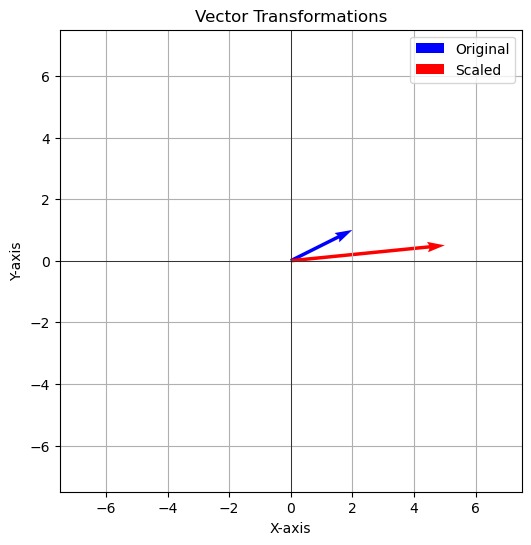

In [3]:
# Define the original vector
v = np.array([2, 1])

# Define the scaling matrix
S = np.array([[2.5, 0], [0, 0.5]])

# Apply the transformation
v_scaled = S @ v

print(f"Original vector:\n{v}")
print(f"\nScaling matrix:\n{S}")
print(f"\nScaled vector:\n{v_scaled}")

# Plot the vectors
plot_vectors([v, v_scaled], ['blue', 'red'], ['Original', 'Scaled'])

## 2. Rotation

Rotation moves a vector around the origin by a certain angle $\theta$ without changing its length.

The counter-clockwise rotation matrix is:
$$ R_\theta = \begin{pmatrix} \cos\theta & -\sin\theta \\ \sin\theta & \cos\theta \end{pmatrix} $$

### Example: Rotate a vector
Let's rotate the vector $ \vec{v} = \begin{pmatrix} 3 \\ 2 \end{pmatrix} $ by $90^\circ$ counter-clockwise.

For $\theta = 90^\circ$, we have $\cos(90^\circ) = 0$ and $\sin(90^\circ) = 1$. The transformation matrix is $ R_{90^\circ} = \begin{pmatrix} 0 & -1 \\ 1 & 0 \end{pmatrix} $.

The transformed vector $\vec{v'}$ is:
$$ \vec{v'} = R_{90^\circ} \cdot \vec{v} = \begin{pmatrix} 0 & -1 \\ 1 & 0 \end{pmatrix} \begin{pmatrix} 3 \\ 2 \end{pmatrix} = \begin{pmatrix} 0 \times 3 + (-1) \times 2 \\ 1 \times 3 + 0 \times 2 \end{pmatrix} = \begin{pmatrix} -2 \\ 3 \end{pmatrix} $$

Original vector:
[3 2]

Rotation matrix (90 degrees):
[[ 0. -1.]
 [ 1.  0.]]

Rotated vector:
[-2.  3.]


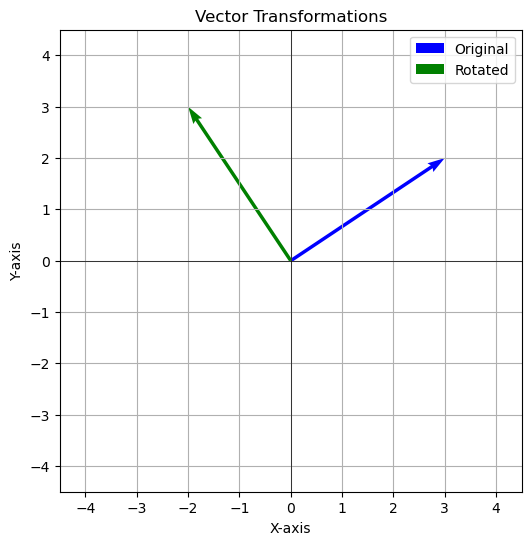

In [4]:
# Define the original vector
v = np.array([3, 2])

# Define the rotation angle in radians (90 degrees)
theta = np.pi / 2

# Define the rotation matrix
R = np.array([
    [np.cos(theta), -np.sin(theta)], 
    [np.sin(theta), np.cos(theta)]
])

# Apply the transformation
v_rotated = R @ v

print(f"Original vector:\n{v}")
print(f"\nRotation matrix (90 degrees):\n{R.round(2)}")
print(f"\nRotated vector:\n{v_rotated.round(2)}")

# Plot the vectors
plot_vectors([v, v_rotated], ['blue', 'green'], ['Original', 'Rotated'])

## 3. Reflection

Reflection flips a vector across a line (or a plane in higher dimensions). 

The matrix for reflection across the **x-axis** is: $ F_x = \begin{pmatrix} 1 & 0 \\ 0 & -1 \end{pmatrix} $

The matrix for reflection across the **y-axis** is: $ F_y = \begin{pmatrix} -1 & 0 \\ 0 & 1 \end{pmatrix} $

### Example: Reflect a vector
Let's reflect the vector $ \vec{v} = \begin{pmatrix} 3 \\ 4 \end{pmatrix} $ across the x-axis.

The transformed vector $\vec{v'}$ is:
$$ \vec{v'} = F_x \cdot \vec{v} = \begin{pmatrix} 1 & 0 \\ 0 & -1 \end{pmatrix} \begin{pmatrix} 3 \\ 4 \end{pmatrix} = \begin{pmatrix} 1 \times 3 + 0 \times 4 \\ 0 \times 3 + (-1) \times 4 \end{pmatrix} = \begin{pmatrix} 3 \\ -4 \end{pmatrix} $$

Original vector:
[3 4]

Reflection matrix (x-axis):
[[ 1  0]
 [ 0 -1]]

Reflected vector:
[ 3 -4]


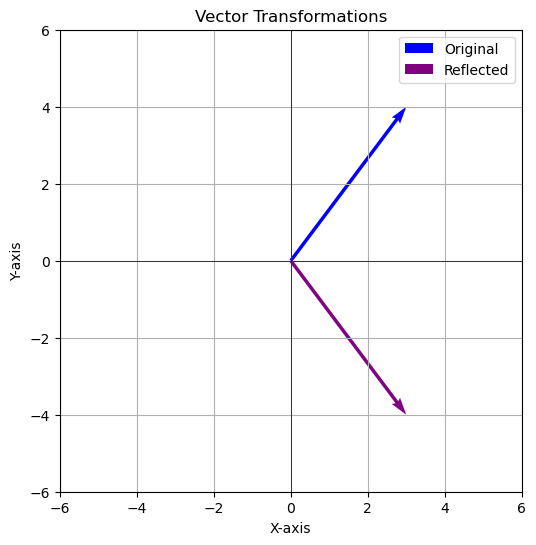

In [5]:
# Define the original vector
v = np.array([3, 4])

# Define the reflection matrix (across x-axis)
F_x = np.array([[1, 0], [0, -1]])

# Apply the transformation
v_reflected = F_x @ v

print(f"Original vector:\n{v}")
print(f"\nReflection matrix (x-axis):\n{F_x}")
print(f"\nReflected vector:\n{v_reflected}")

# Plot the vectors
plot_vectors([v, v_reflected], ['blue', 'purple'], ['Original', 'Reflected'])

## 4. Shearing

Shearing skews a vector, shifting one coordinate based on the value of the other. It's like pushing the top of a deck of cards sideways.

The **horizontal shear** matrix is: $ H_x = \begin{pmatrix} 1 & k \\ 0 & 1 \end{pmatrix} $ (shifts x-coordinate)

The **vertical shear** matrix is: $ H_y = \begin{pmatrix} 1 & 0 \\ k & 1 \end{pmatrix} $ (shifts y-coordinate)

Here, $k$ is the shear factor.

### Example: Apply horizontal shear
Let's apply a horizontal shear with $k=1.5$ to the vector $ \vec{v} = \begin{pmatrix} 1 \\ 2 \end{pmatrix} $.

The transformation matrix is $ H_x = \begin{pmatrix} 1 & 1.5 \\ 0 & 1 \end{pmatrix} $.

The transformed vector $\vec{v'}$ is:
$$ \vec{v'} = H_x \cdot \vec{v} = \begin{pmatrix} 1 & 1.5 \\ 0 & 1 \end{pmatrix} \begin{pmatrix} 1 \\ 2 \end{pmatrix} = \begin{pmatrix} 1 \times 1 + 1.5 \times 2 \\ 0 \times 1 + 1 \times 2 \end{pmatrix} = \begin{pmatrix} 4 \\ 2 \end{pmatrix} $$

Original vector:
[1 2]

Shear matrix (horizontal):
[[1.  1.5]
 [0.  1. ]]

Sheared vector:
[4. 2.]


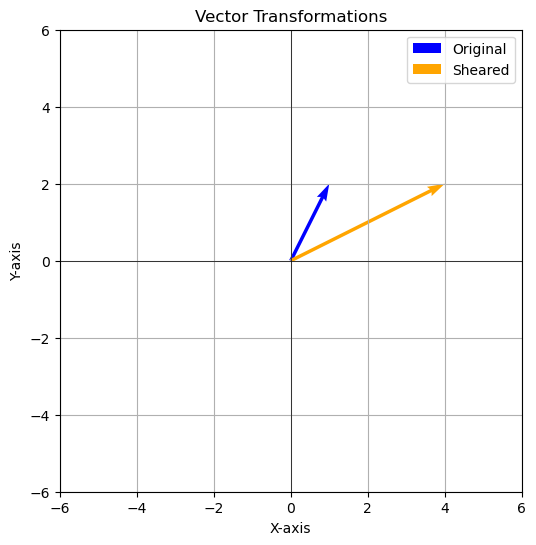

In [6]:
# Define the original vector
v = np.array([1, 2])

# Define the horizontal shear matrix
H_x = np.array([[1, 1.5], [0, 1]])

# Apply the transformation
v_sheared = H_x @ v

print(f"Original vector:\n{v}")
print(f"\nShear matrix (horizontal):\n{H_x}")
print(f"\nSheared vector:\n{v_sheared}")

# Plot the vectors
plot_vectors([v, v_sheared], ['blue', 'orange'], ['Original', 'Sheared'])

## 5. Composition of Transformations

We can apply multiple transformations sequentially. This is done by multiplying their matrices. The key is that the matrices are applied from **right to left**.

If we want to first apply transformation $T_1$ and then transformation $T_2$ to a vector $\vec{v}$, the combined transformation is:

$$ \vec{v'} = (T_2 \cdot T_1) \cdot \vec{v} $$

The order matters! $T_2 \cdot T_1$ is generally not the same as $T_1 \cdot T_2$.

### Example: Rotate then Scale
Let's take the vector $ \vec{v} = \begin{pmatrix} 2 \\ 0 \end{pmatrix} $. We will first **rotate** it by $45^\circ$ counter-clockwise, and then **scale** it by 2 in the y-direction.

1.  **Rotation Matrix ($T_1$)**: For $\theta = 45^\circ$, $\cos(45^\circ) = \sin(45^\circ) = \frac{1}{\sqrt{2}} \approx 0.707$.
    $$ R_{45^\circ} = \begin{pmatrix} 0.707 & -0.707 \\ 0.707 & 0.707 \end{pmatrix} $$

2.  **Scaling Matrix ($T_2$)**: Scale y-axis by 2.
    $$ S = \begin{pmatrix} 1 & 0 \\ 0 & 2 \end{pmatrix} $$

The combined transformation matrix $C$ is $S \cdot R_{45^\circ}$:
$$ C = \begin{pmatrix} 1 & 0 \\ 0 & 2 \end{pmatrix} \begin{pmatrix} 0.707 & -0.707 \\ 0.707 & 0.707 \end{pmatrix} = \begin{pmatrix} 0.707 & -0.707 \\ 1.414 & 1.414 \end{pmatrix} $$

Now, let's apply this to our vector:
$$ \vec{v'} = C \cdot \vec{v} = \begin{pmatrix} 0.707 & -0.707 \\ 1.414 & 1.414 \end{pmatrix} \begin{pmatrix} 2 \\ 0 \end{pmatrix} = \begin{pmatrix} 1.414 \\ 2.828 \end{pmatrix} $$

Original vector:
[2 0]

--- Step 1: After Rotation ---
[1.414 1.414]

--- Step 2: After Scaling ---
[1.414 2.828]

Composite Matrix C = S @ R:
[[ 0.707 -0.707]
 [ 1.414  1.414]]

Final vector using composite matrix:
[1.414 2.828]


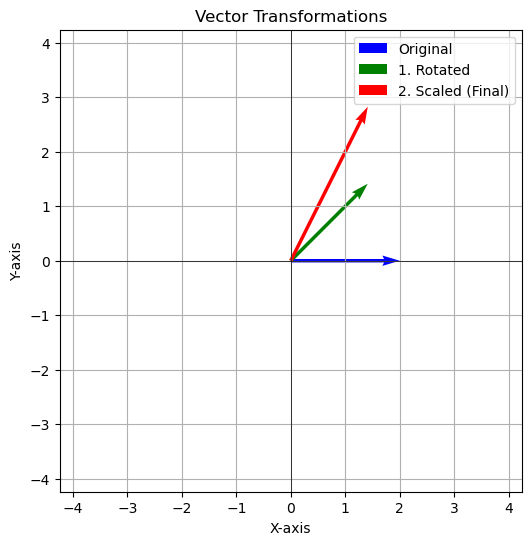

In [7]:
# Define the original vector
v = np.array([2, 0])

# 1. Define the rotation matrix (45 degrees)
theta = np.pi / 4
R = np.array([
    [np.cos(theta), -np.sin(theta)], 
    [np.sin(theta), np.cos(theta)]
])

# 2. Define the scaling matrix (y-axis by 2)
S = np.array([[1, 0], [0, 2]])

# Apply transformations step-by-step to see the intermediate result
v_rotated = R @ v
v_final = S @ v_rotated # Apply scaling to the rotated vector

# Or, create a composite matrix and apply it once
C = S @ R
v_composite = C @ v

print(f"Original vector:\n{v}")
print(f"\n--- Step 1: After Rotation ---\n{v_rotated.round(3)}")
print(f"\n--- Step 2: After Scaling ---\n{v_final.round(3)}")
print(f"\nComposite Matrix C = S @ R:\n{C.round(3)}")
print(f"\nFinal vector using composite matrix:\n{v_composite.round(3)}")

# Plot all vectors
plot_vectors(
    [v, v_rotated, v_final], 
    ['blue', 'green', 'red'], 
    ['Original', '1. Rotated', '2. Scaled (Final)']
)